# Explore here

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


# Set a random seed to ensure reproducibility across runs
RNG_SEED = 42
np.random.seed(seed=RNG_SEED)

#STEP 1) Connect to the database and convert it to a dataframe
PATH = os.getcwd()
data_path = os.path.join(PATH, '/workspaces/Data_Preprocessing_Project_TutorialDianaM/data/raw/AB_NYC_2019.csv')
df = pd.read_csv(data_path)


# STEP 2) Problem statement:
print("Problem statement: The goal of this analysis is assessing what are the main factors impacting price.")
print("Assuming anything impacting price in any industry is normaly related to trust, and more specificially in Airbnb business case, we will also look specially into the review-related variables and other variables impacting the review-related ones.")


Problem statement: The goal of this analysis is assessing what are the main factors impacting price.
Assuming anything impacting price in any industry is normaly related to trust, and more specificially in Airbnb business case, we will also look specially into the review-related variables and other variables impacting the review-related ones.


In [2]:
#STEP 3) First data overiew: data status
df.info()

print(f"\n There are {df.isnull().any().sum()} columns with missing values in the database: {', '.join(df.columns[df.isnull().any()])}")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [3]:
#STEP 3) First data overiew: table visualization

df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
#STEP 3) First data overiew: Descriptive analysis and first outlier overview

df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [5]:
#STEP 3.B) First data overiew: Descriptive analysis and first outlier overview

import pandas as pd
import numpy as np

def describe_outliers(df):
    """
    Based on the describe() analysis, this function finds potential outliers in numerical columns (excluding 'host_id' and 'id')
    and explains why they might be outliers, including the number of rows and first the 5 of upper/lower outliers.

    """
    num_cols = df.select_dtypes(include=np.number).columns.tolist()
    exclude_cols = ['host_id', 'id']
    num_cols = [col for col in num_cols if col not in exclude_cols]
    
    for col in num_cols:
        desc = df[col].describe()
        Q1 = desc['25%']
        Q3 = desc['75%']
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
    
        upper_outliers = df[df[col] > upper_bound][col].tolist()
        lower_outliers = df[df[col] < lower_bound][col].tolist()
        
        outliers = upper_outliers + lower_outliers
        
        if outliers:
            print(f"Column '{col}':")
            print(f"  - Applying the rule: 'Comparing min/max to 25%/75% percentiles'")
            print(f"  - Minimum: {desc['min']}, Maximum: {desc['max']}")
            print(f"  - 25% percentile: {Q1}, 75% percentile: {Q3}")
            print(f"  - Difference (min - 25%): {round(desc['min'] - Q1, 4)}")
            print(f"  - Difference (max - 75%): {round(desc['max'] - Q3, 4)}")
            print(f"  - Potential upper outliers (first 5 or all): {upper_outliers[:5]}") 
            print(f"  - Potential lower outliers (first 5 or all): {lower_outliers[:5]}") 
            print(f"  - Potential number of upper outliers: {len(upper_outliers)}")
            print(f"  - Potential number of lower outliers: {len(lower_outliers)}\n")

describe_outliers(df)

print("This function provide a first overiew of the potential outliers of the database but further in-depth analysis of outliers will be developed below from STEP 6.")

Column 'latitude':
  - Applying the rule: 'Comparing min/max to 25%/75% percentiles'
  - Minimum: 40.49979, Maximum: 40.91306
  - 25% percentile: 40.6901, 75% percentile: 40.763115
  - Difference (min - 25%): -0.1903
  - Difference (max - 75%): 0.1499
  - Potential upper outliers (first 5 or all): [40.88057, 40.89747, 40.89557, 40.87991, 40.88757]
  - Potential lower outliers (first 5 or all): [40.5781, 40.50868, 40.57728, 40.57519, 40.53884]
  - Potential number of upper outliers: 254
  - Potential number of lower outliers: 171

Column 'longitude':
  - Applying the rule: 'Comparing min/max to 25%/75% percentiles'
  - Minimum: -74.24442, Maximum: -73.71299
  - 25% percentile: -73.98307, 75% percentile: -73.936275
  - Difference (min - 25%): -0.2614
  - Difference (max - 75%): 0.2233
  - Potential upper outliers (first 5 or all): [-73.83168, -73.76597, -73.85514, -73.83572, -73.76133]
  - Potential lower outliers (first 5 or all): [-74.08088, -74.08537, -74.08543, -74.08546, -74.08519]


In [6]:
# STEP 4) Overall duplicates control:

# Total
df.duplicated().sum()


np.int64(0)

In [7]:
# STEP 4) Duplicates control:

# By "id"
df.duplicated("id").sum()


np.int64(0)

In [8]:
# STEP 4) Dduplicates control except "id"
df.drop("id", axis = 1).duplicated().sum()
# df.drop("id", axis=1): This part creates a temporary copy of the DataFrame df with the 'id' column removed using drop(). axis=1 specifies that we are dropping a column.

np.int64(0)

In [9]:
# STEP 5) Selecting atributes (excluding the non-relevant ones):

df.drop(["id", "name", "host_name", "host_id"], axis = 1, inplace = True)
df.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [10]:
# STEP 5) Updating status of the database after selecting atributes (excluding the non-relevant ones): 

df.info()

print(f"There are {df.isnull().any().sum()} columns with missing values in the database: {', '.join(df.columns[df.isnull().any()])}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             48895 non-null  object 
 1   neighbourhood                   48895 non-null  object 
 2   latitude                        48895 non-null  float64
 3   longitude                       48895 non-null  float64
 4   room_type                       48895 non-null  object 
 5   price                           48895 non-null  int64  
 6   minimum_nights                  48895 non-null  int64  
 7   number_of_reviews               48895 non-null  int64  
 8   last_review                     38843 non-null  object 
 9   reviews_per_month               38843 non-null  float64
 10  calculated_host_listings_count  48895 non-null  int64  
 11  availability_365                48895 non-null  int64  
dtypes: float64(3), int64(5), object(

In [11]:
# STEP 6) Missing or Nan values: identify and count them

df.isnull().sum()

neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [12]:
# STEP 6) Missing or Nan values:

# 6.A) Filling missing values ('last_review'):

df["last_review"].fillna("Missing date", inplace = True)
df["last_review"].head(50)

/tmp/ipykernel_7019/3564901253.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["last_review"].fillna("Missing date", inplace = True)


0       2018-10-19
1       2019-05-21
2     Missing date
3       2019-07-05
4       2018-11-19
5       2019-06-22
6       2017-10-05
7       2019-06-24
8       2017-07-21
9       2019-06-09
10      2019-06-22
11      2019-06-23
12      2019-06-24
13      2019-07-05
14      2018-10-31
15      2019-06-29
16      2019-06-28
17      2019-07-01
18      2019-06-22
19    Missing date
20      2011-12-28
21      2019-07-01
22      2019-01-01
23      2019-07-02
24      2019-06-19
25      2019-06-23
26    Missing date
27      2017-08-13
28      2019-06-15
29      2019-04-19
30      2019-06-01
31      2019-06-14
32      2019-06-15
33      2019-07-01
34      2019-05-12
35      2019-06-21
36    Missing date
37      2019-06-22
38    Missing date
39      2019-07-05
40      2019-06-21
41      2019-05-27
42      2018-09-30
43      2019-06-16
44      2019-06-13
45      2019-06-05
46      2019-07-01
47      2019-05-25
48      2017-01-01
49      2019-06-17
Name: last_review, dtype: object

In [13]:
df.isnull().sum()

neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                           0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [14]:
# STEP 6) Missing or Nan values: Filling missing values ('reviews_per_month'): Identifying which variables are more related to "reviews_per_month"
# In order to do so, we need to:

# 6.A) Convert to numeric the categorical variables (by factorize())

    # By first grouping related variables: groupoing "neighbourhood"-related variables into one ("Area")

df["Area"] = df["neighbourhood_group"] + "/" + df["neighbourhood"]
df

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Area
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,Brooklyn/Kensington
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,Manhattan/Midtown
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,Missing date,NaN,1,365,Manhattan/Harlem
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,Brooklyn/Clinton Hill
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,Manhattan/East Harlem
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,Missing date,NaN,2,9,Brooklyn/Bedford-Stuyvesant
48891,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,Missing date,NaN,2,36,Brooklyn/Bushwick
48892,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,Missing date,NaN,1,27,Manhattan/Harlem
48893,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,Missing date,NaN,6,2,Manhattan/Hell's Kitchen


In [16]:
# STEP 6) Missing or Nan values: Filling missing values ('reviews_per_month'): Identifying which variables are more related to reviews_per_month

# 6.A) Convert to numeric the -grouped- categorical variables (by factorize()): "room_type", "last_review" and "Area"
import pandas as pd
df['room_type_n'] = pd.factorize(df['room_type'])[0]
df['last_review_n'] = pd.factorize(df['last_review'])[0]
df['Area_n'] = pd.factorize(df['Area'])[0]
df

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Area,room_type_n,last_review_n,Area_n
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,Brooklyn/Kensington,0,0,0
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,Manhattan/Midtown,1,1,1
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,Missing date,NaN,1,365,Manhattan/Harlem,0,2,2
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,Brooklyn/Clinton Hill,1,3,3
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,Manhattan/East Harlem,1,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,Missing date,NaN,2,9,Brooklyn/Bedford-Stuyvesant,0,2,6
48891,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,Missing date,NaN,2,36,Brooklyn/Bushwick,0,2,21
48892,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,Missing date,NaN,1,27,Manhattan/Harlem,1,2,2
48893,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,Missing date,NaN,6,2,Manhattan/Hell's Kitchen,2,2,7


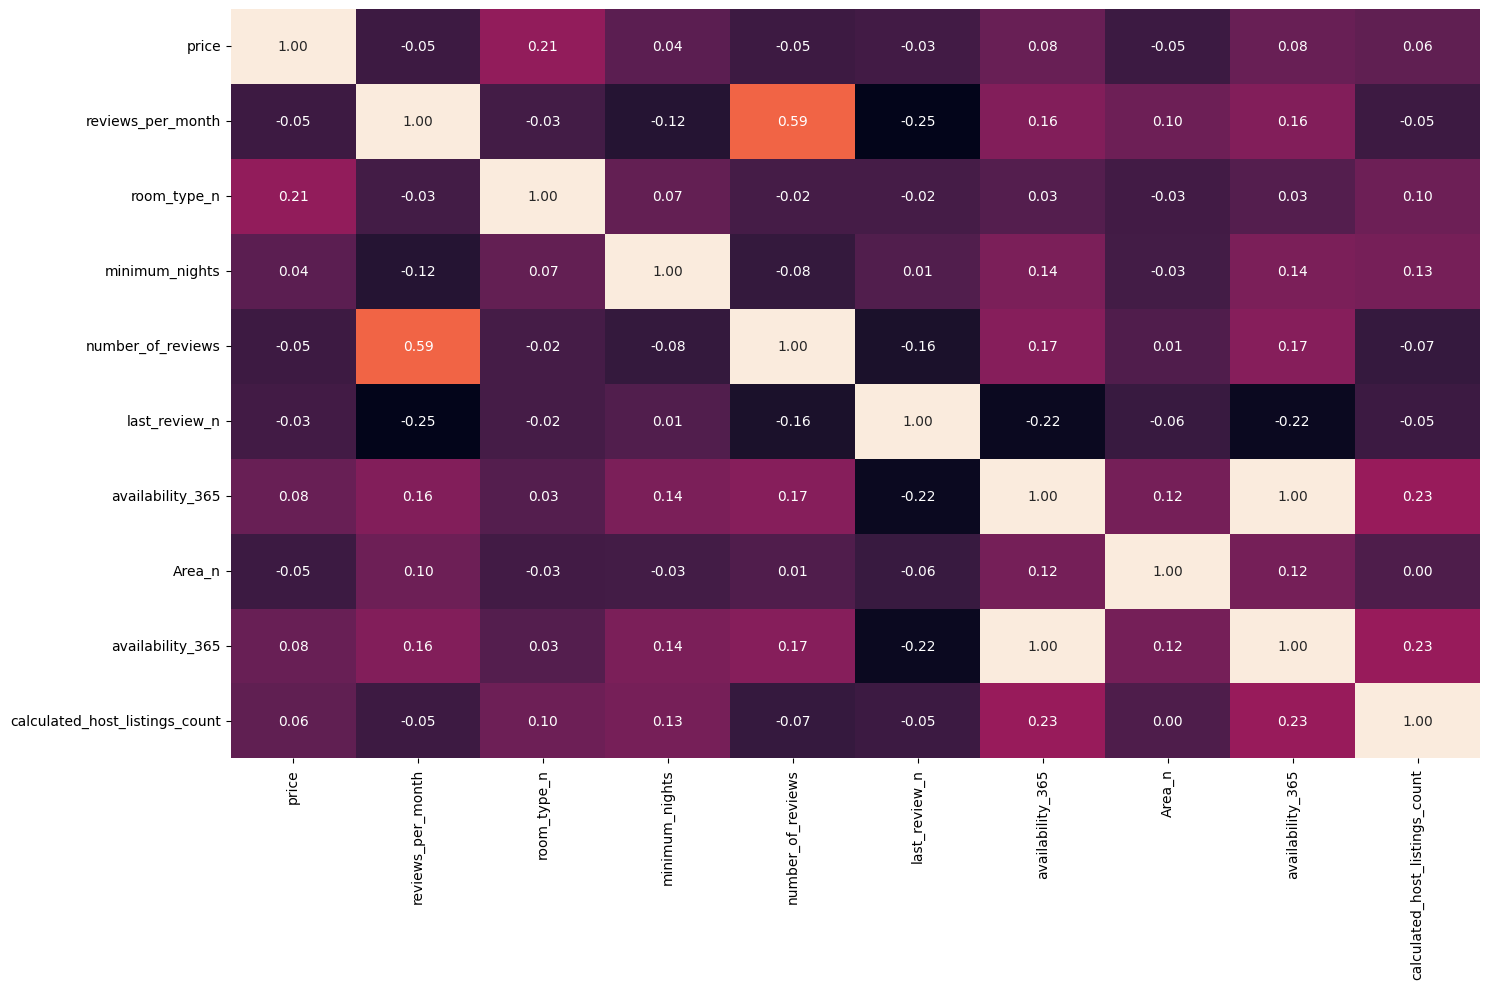

In [ ]:
# STEP 6) Missing or Nan values: Filling missing values ('reviews_per_month'): Identifying which variables are more related to reviews_per_month

# 6.B) Create a multiple scatter diagram to figure variables correlated enough with "reviews_per_month" to fill up missing values 

import matplotlib.pyplot as plt
import seaborn as sns

# Heatmap using the factorized variables
plt.figure(figsize=(15, 10))  
sns.heatmap(df[["price","reviews_per_month", "room_type_n", "minimum_nights", "number_of_reviews", "last_review_n", "availability_365", "Area_n", "availability_365", "calculated_host_listings_count"]].corr(), annot = True, fmt = ".2f", cbar = False)
plt.tight_layout()
plt.show()


In [28]:
# STEP 6) Missing or Nan values: Filling missing values ('reviews_per_month'): 

# 6.C) Filling missing values ('reviews_per_month') with KNNImputer: confirming the number of zeros in "number_of_reviews" conincides with the number of ceros in 'reviews_per_month'

filtered_df = df[df["reviews_per_month"].isnull()]
null_revsmonth_where_num_revszero = filtered_df[filtered_df['number_of_reviews'] == 0]
count_zeros = len(null_revsmonth_where_num_revszero)
count_non_zeros = len(filtered_df) - count_zeros 

print(f"Missing values in 'reviews_per_month': {len(df['reviews_per_month'].isnull())}")
print(f"Missing values in 'reviews_per_month' where 'number_of_reviews' is 0: {count_zeros}")
print(f"Missing values in 'reviews_per_month' where 'number_of_reviews' is not 0: {count_non_zeros}")

if count_non_zeros == 0:
    print("All missing values in 'reviews_per_month' correspond to zeros in 'number_of_reviews'.")
    print("Substituting missing values with 0 is likely appropriate.")
else:
    print("There are missing values in 'reviews_per_month' where 'number_of_reviews' is not 0.")
    print("Further investigation is needed before substituting with 0.")
    print("Consider using imputation techniques like KNNImputer for these cases.")

Missing values in 'reviews_per_month': 48895
Missing values in 'reviews_per_month' where 'number_of_reviews' is 0: 10052
Missing values in 'reviews_per_month' where 'number_of_reviews' is not 0: 0
All missing values in 'reviews_per_month' correspond to zeros in 'number_of_reviews'.
Substituting missing values with 0 is likely appropriate.


In [30]:
df.isnull().sum()

neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                           0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
Area                                  0
room_type_n                           0
last_review_n                         0
Area_n                                0
dtype: int64

In [31]:
# STEP 6) Missing or Nan values: Filling missing values ('reviews_per_month'): 
# 6.D) Given the previous step, we use the fillna() to fill up the Nans in this column

df['reviews_per_month'] = df['reviews_per_month'].fillna(0)
df

print("In order to further deal with the remaining Nans in 'reviews_per_month', we turn them into zero using fillna()")

In order to further deal with the remaining Nans in 'reviews_per_month', we turn them into zero using fillna()


In [32]:
df.isnull().sum()

neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
Area                              0
room_type_n                       0
last_review_n                     0
Area_n                            0
dtype: int64

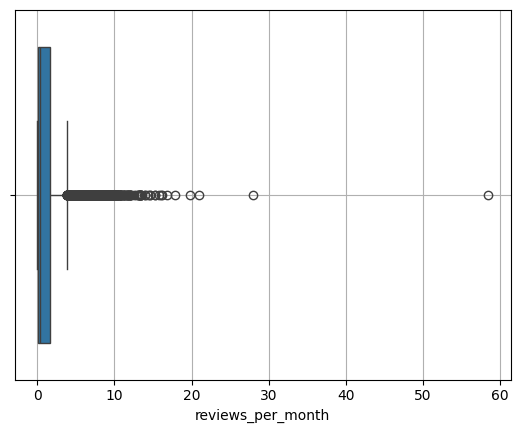

In [ ]:
# NOT NEEDED - STEP 6) Missing or Nan values: Filling missing values ('reviews_per_month'): 

# 6.E) Other ways of filling missing values in ('reviews_per_month') with the mean if there are not outliers

    # Identify outliers in 'reviews_per_month' using a boxplot

import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(data = df, x = 'reviews_per_month').grid(True)
plt.show()

In [ ]:
# NO EJECUTAR - YA SE USÓ FILLNA(0)

# STEP 6) Missing or Nan values: Filling missing values ('reviews_per_month') 

# 6.F) NOT TO EXECUTE - ALTERNATIVE - : Filling missing values with the median since there are outliers and there aren't correlated enough variables to 'reviews_per_month'

#df['reviews_per_month'].fillna(df['reviews_per_month'].median(), inplace = True)

In [33]:
df['reviews_per_month'].isnull().sum()

np.int64(0)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             48895 non-null  object 
 1   neighbourhood                   48895 non-null  object 
 2   latitude                        48895 non-null  float64
 3   longitude                       48895 non-null  float64
 4   room_type                       48895 non-null  object 
 5   price                           48895 non-null  int64  
 6   minimum_nights                  48895 non-null  int64  
 7   number_of_reviews               48895 non-null  int64  
 8   last_review                     48895 non-null  object 
 9   reviews_per_month               48895 non-null  float64
 10  calculated_host_listings_count  48895 non-null  int64  
 11  availability_365                48895 non-null  int64  
 12  Area                            

/tmp/ipykernel_7019/3118095655.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axis[0].set_xticklabels(axis[0].get_xticklabels(), rotation=45, ha='right')


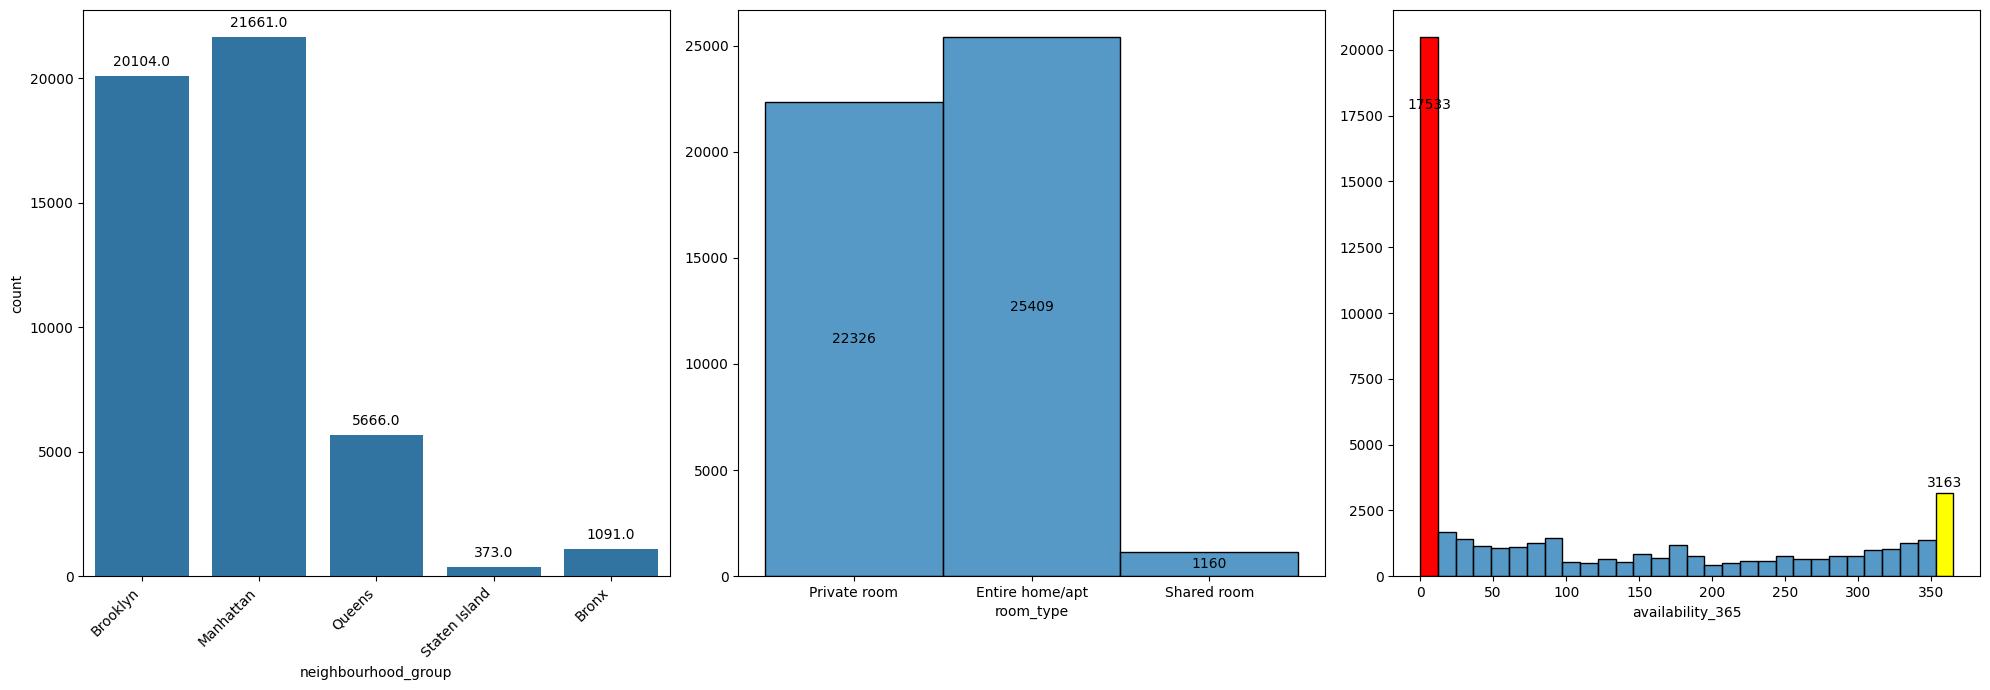

47735
In a first overview of categorical variables, we observe that most of the listings (41765) are located in Brooklyn and Manhattan, nearly equally distributed between those areas.
Also, most of the listings (47735, 97.6%) are wether private rooms or entire homes.
Finally, we can clearly see that there are 17533 'no available' listings (35.9% of the total 48895 listings) that have zero available days in the year, while the rest of the listings 31362 range between 1 and 365 available days a year.
Given the rellevance of the 'no availabe', we listings should consider running all the following steps and futher modeling into 2 data samples: A) Sample including the 17533 listings with no available days and B) a sample excluding those no available listings


In [ ]:
# STEP 7) First Univariate Categorical and Numerical Overview:

import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(1, 3, figsize=(20, 7))

ax = sns.countplot(ax=axis[0], data=df, x="neighbourhood_group") 
axis[0].set_xticklabels(axis[0].get_xticklabels(), rotation=45, ha='right')  
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')


ax2 = sns.histplot(ax=axis[1], data=df, x="room_type")  
ax2.set(ylabel=None) 
for container in ax2.containers:
    ax2.bar_label(container, label_type='center') 


ax3 = sns.histplot(ax=axis[2], data=df, x="availability_365")
ax3.set(ylabel=None)

num_zero_listings = len(df[df["availability_365"] == 0])
max_days_listing = df["availability_365"].max()
min_days_listings = df[df["availability_365"] != 0]["availability_365"].min()

patches = ax3.patches

max_patch = None  

for patch in patches:
    if patch.get_x() == 0:
        patch.set_facecolor('red')
        ax3.text(patch.get_x() + patch.get_width() / 2,
                 num_zero_listings + 100,
                 str(num_zero_listings),
                 ha='center', va='bottom',
                 fontsize=10, color='black')

    if max_patch is None or patch.get_x() > max_patch.get_x():  
        max_patch = patch

if max_patch is not None:
    max_patch.set_facecolor('yellow')
    num_max_listings = max_patch.get_height()  
    ax3.text(max_patch.get_x() + max_patch.get_width() / 2,
             num_max_listings + 100,
             str(int(num_max_listings)), 
             ha='center', va='bottom',
             fontsize=10, color='black')

plt.tight_layout()


plt.show()

# Neighbourhood distribution:
brooklyn_listings = len(df[df["neighbourhood_group"] == "Brooklyn"])
manhattan_listings = len(df[df["neighbourhood_group"] == "Manhattan"])

total_listings_man_brook = brooklyn_listings + manhattan_listings

# Room type distribution
private_rooms = len(df[df["room_type"] == "Private room"])
entire_homes = len(df[df["room_type"] == "Entire home/apt"])

total_common_room_types = private_rooms + entire_homes
print(total_common_room_types)


print(f"In a first overview of categorical variables, we observe that most of the listings ({total_listings_man_brook}) are located in Brooklyn and Manhattan, nearly equally distributed between those areas.")
print(f"Also, most of the listings ({total_common_room_types}, {round(total_common_room_types/df.shape[0], 3)*100}%) are wether private rooms or entire homes.")
print(f"Finally, we can clearly see that there are {num_zero_listings} 'no available' listings ({round(num_zero_listings/df.shape[0], 3)*100}% of the total {df.shape[0]} listings) that have zero available days in the year, while the rest of the listings {df.shape[0]-num_zero_listings} range between {min_days_listings} and {max_days_listing} available days a year.")
print(f"Given the rellevance of the 'no availabe', we listings should consider running all the following steps and futher modeling into 2 data samples: A) Sample including the {num_zero_listings} listings with no available days and B) a sample excluding those no available listings")


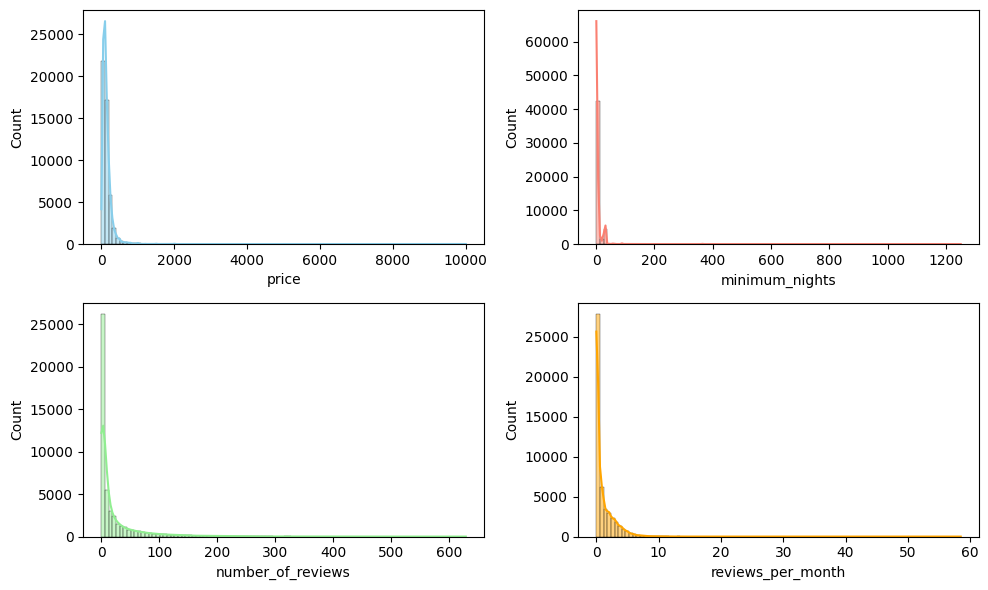

In [ ]:
# STEP 7) Univariate Numerical Overview: 'price', 'minimum_nights', 'number_of_reviews','reviews_per_month'

fig, axis = plt.subplots(2, 2, figsize=(10, 6))
sns.histplot(ax=axis[0, 0], data=df, x="price", bins=100, kde=True, color='skyblue')
sns.histplot(ax=axis[0, 1], data=df, x="minimum_nights", bins=100, kde=True, color='salmon')
sns.histplot(ax=axis[1, 0], data=df, x="number_of_reviews", bins=100, kde=True, color='lightgreen')
sns.histplot(ax=axis[1, 1], data=df, x="reviews_per_month", bins=100, kde=True, color='orange')
plt.tight_layout()
plt.show()

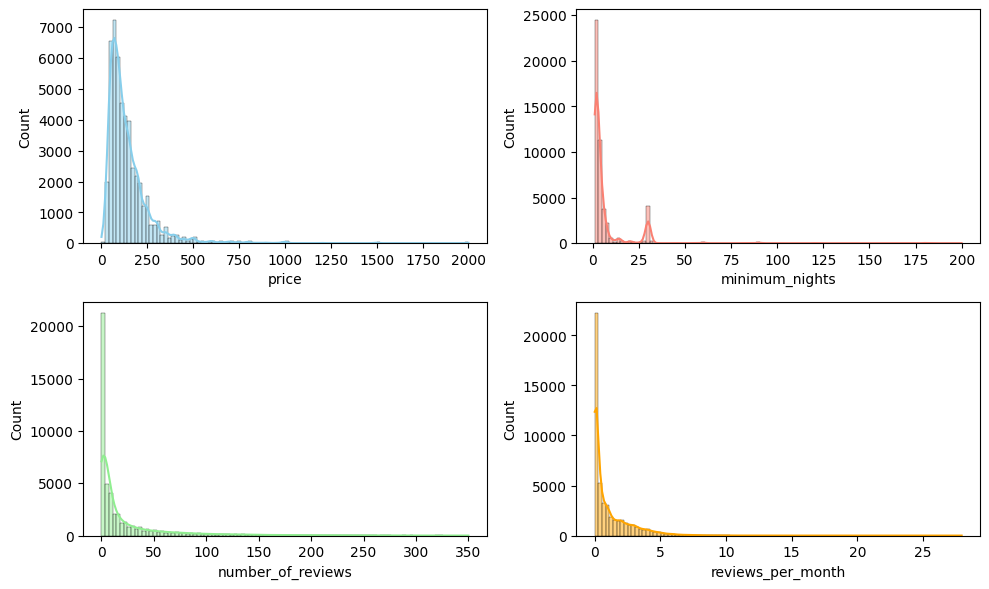

In [ ]:
# STEP 7) Univariate Numerical Overview: 'price', 'minimum_nights', 'number_of_reviews','reviews_per_month'

# 7.A) Zooming in Univariate Numerical Variables Analysis Visualization (roughly below upper outliers): 

fig, axis = plt.subplots(2, 2, figsize=(10, 6))
sns.histplot(ax=axis[0, 0], data=df, x=df[df["price"] <= 2000]["price"], bins=100, kde=True, color='skyblue')
sns.histplot(ax=axis[0, 1], data=df, x=df[df["minimum_nights"] <= 200]["minimum_nights"], bins=100, kde=True, color='salmon')
sns.histplot(ax=axis[1, 0], data=df, x=df[df["number_of_reviews"] <= 350]["number_of_reviews"], bins=100, kde=True, color='lightgreen')
sns.histplot(ax=axis[1, 1], data=df, x=df[df["reviews_per_month"] <= 30]["reviews_per_month"], bins=100, kde=True, color='orange')
# Adjust layout and show the plot
plt.tight_layout()
plt.show()

/tmp/ipykernel_3851/4098324585.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


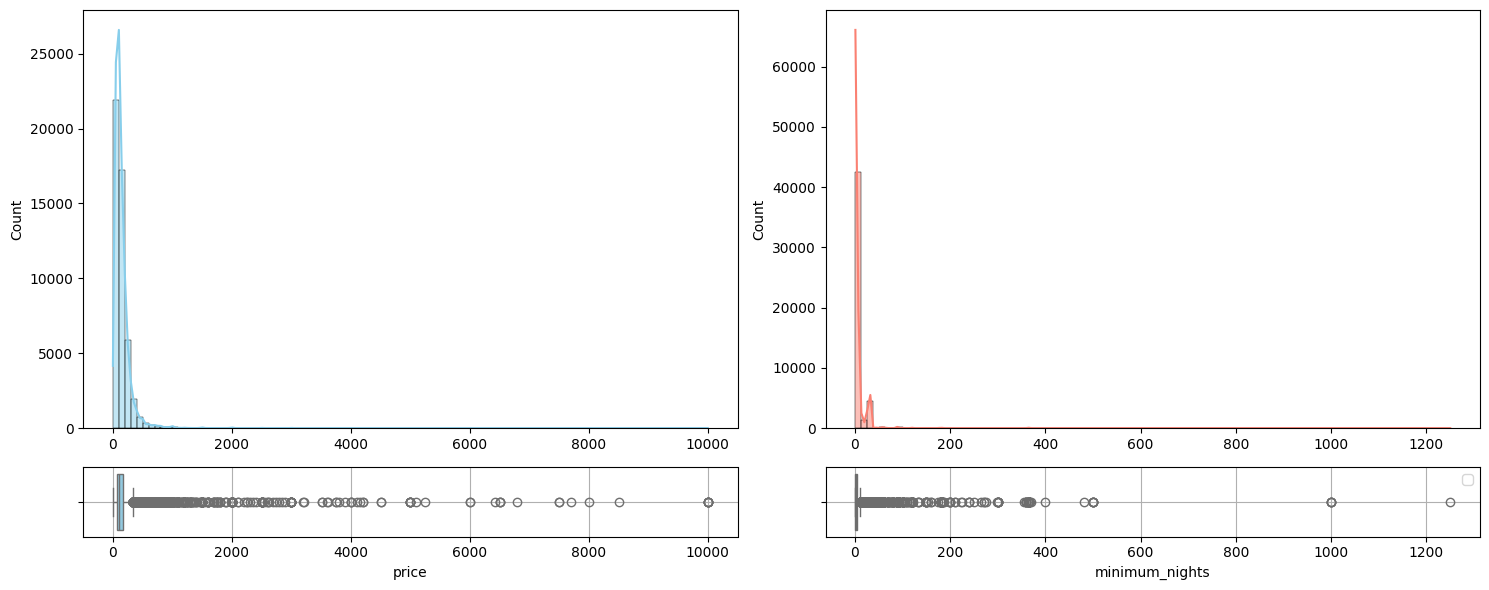

In [ ]:
# STEP 7) Univariate Numerical Analysis: 'price', 'minimum_nights', 'number_of_reviews','reviews_per_month'

# 7.B) Outliers overview ('price', 'minimum_nights')

import pandas as pd

fig, axis = plt.subplots(2,2, figsize = (15,6), gridspec_kw={'height_ratios': [6, 1]})

#"price"
sns.histplot(ax=axis[0, 0], data=df, x="price", bins=100, kde=True, color='skyblue').set(xlabel=None)
sns.boxplot(ax=axis[1,0], data=df, x = 'price', color='skyblue').grid(True)

#'minimum_nights'
sns.histplot(ax=axis[0, 1], data=df, x="minimum_nights", bins=100, kde=True, color='salmon').set(xlabel=None)
sns.boxplot(ax=axis[1,1], data = df, x = 'minimum_nights', color='salmon').grid(True)

plt.tight_layout()
plt.legend()
plt.show()

/tmp/ipykernel_3851/2151016370.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


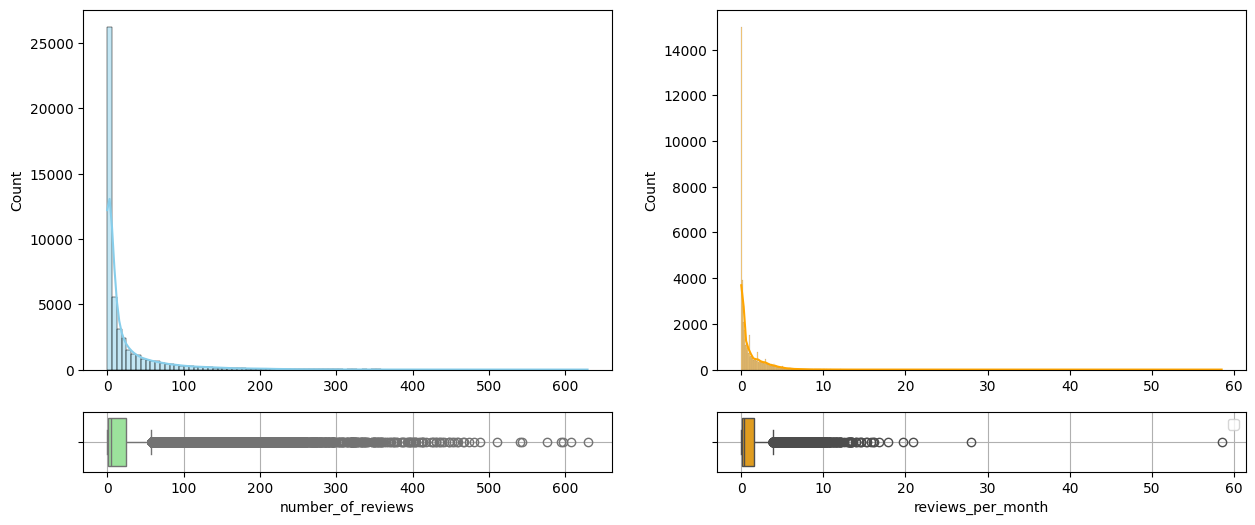

In [ ]:
# STEP 7) Univariate Numerical Analysis: 'price', 'minimum_nights', 'number_of_reviews','reviews_per_month'

# 7.C) Outliers overview ('number_of_reviews', 'reviews_per_month')

fig, axis = plt.subplots(2,2, figsize = (15,6), gridspec_kw={'height_ratios': [6, 1]})

#'number_of_reviews'
sns.histplot(ax=axis[0, 0], data=df, x='number_of_reviews', bins=100, kde=True, color='skyblue').set(xlabel=None)
sns.boxplot(ax=axis[1,0], data = df, x = 'number_of_reviews', color='lightgreen').grid(True)

#'reviews_per_month'
sns.histplot(ax=axis[0,1], data = df, x = 'reviews_per_month', binrange=(0, df['reviews_per_month'].max()), kde=True, color='orange').set(xlabel=None)
sns.boxplot(ax=axis[1,1], data = df, x = 'reviews_per_month', color='orange').grid(True)

plt.legend()
plt.show()

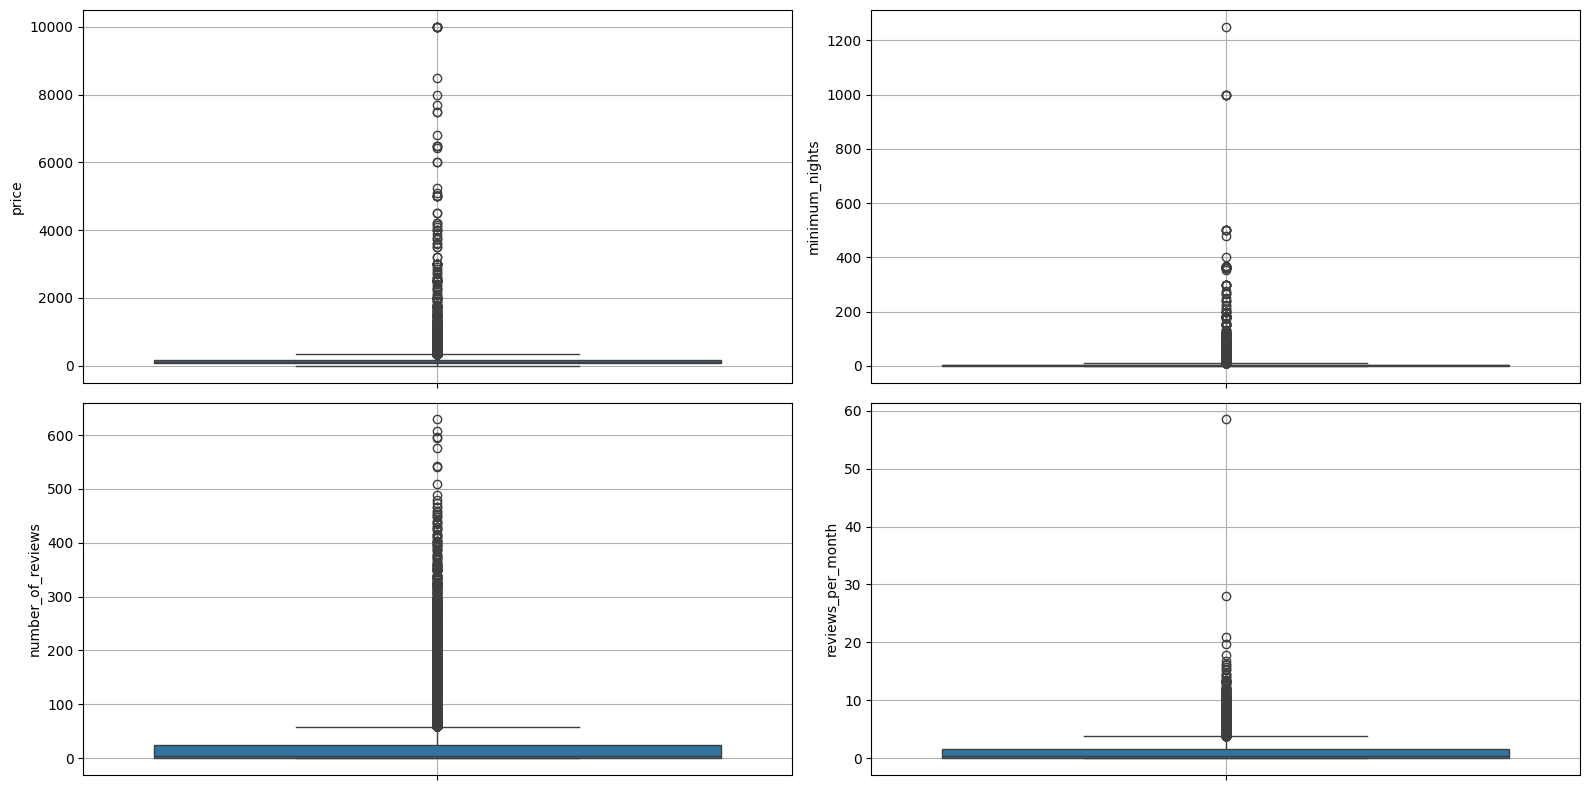

In [ ]:
# STEP 7) Univariate Numerical Analysis: 'price', 'minimum_nights', 'number_of_reviews','reviews_per_month'

# 7.D) Zooming in into outliers ('price', 'minimum_nights', 'number_of_reviews','reviews_per_month')

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

fig, axis = plt.subplots(2, 2, figsize = (16, 8))

sns.boxplot(ax = axis[0, 0], data = df, y = 'price').grid(True)
sns.boxplot(ax = axis[0, 1], data = df, y = 'minimum_nights').grid(True)
sns.boxplot(ax = axis[1, 0], data = df, y = 'number_of_reviews').grid(True)
sns.boxplot(ax = axis[1, 1], data = df, y = 'reviews_per_month').grid(True)


plt.tight_layout()

In [ ]:
# STEP 7) Univariate Numerical Analysis: 'price', 'minimum_nights', 'number_of_reviews','reviews_per_month'

# 7.D) Deciding what to do with outliers of 'reviews_per_month'

# Calculate the first quartile (Q1) and the third quartile (Q3)
Q1 = df['reviews_per_month'].quantile(0.25)
Q3 = df['reviews_per_month'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper limits
lower_limit = Q1 - 3 * IQR
upper_limit = Q3 + 3 * IQR

print(f"Regardless the upper and lower limits of reviews_per_month are {round(upper_limit, 2)} and {round(lower_limit, 2)}, with an interquartile range of {round(IQR, 2)}, based on the previous boxplot for this variable, we will further check how many outlier are above the visible upper value in >=29 of reviews per month in order to better decide what to do with the outliers")

Regardless the upper and lower limits of reviews_per_month are 6.2 and -4.58, with an interquartile range of 1.54, based on the previous boxplot for this variable, we will further check how many outlier are above the visible upper value in >=29 of reviews per month in order to better decide what to do with the outliers


In [ ]:
# STEP 7) Univariate Numerical Analysis:'price', 'minimum_nights', 'number_of_reviews','reviews_per_month'

# 7.D) Further deciding what to do with outliers of 'reviews_per_month'

# Calculating how many registries are above the visible upper limits based on the plot
reviews_month_outliers = df[df['reviews_per_month'] >= 29]

above29_reviews_month = len(reviews_month_outliers.sort_values(by=['reviews_per_month'], ascending=False))

print(f"Despite there is just {above29_reviews_month} listing above 29 reviews per month, we will still keep this registry since this is outliner is plausible and worth being considered in our model")

Despite there is just 1 listing above 29 reviews per month, we will still keep this registry since this is outliner is plausible and worth being considered in our model


In [ ]:
df.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Area,room_type_n,last_review_n,Area_n,neighbourhood_group_n
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,Brooklyn/Kensington,0,0,0,0
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,Manhattan/Midtown,1,1,1,1
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,Missing date,0.00,1,365,Manhattan/Harlem,0,2,2,1
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,Brooklyn/Clinton Hill,1,3,3,0
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,Manhattan/East Harlem,1,4,4,1


In [ ]:
# STEP 7) Univariate Numerical Analysis: 'price', 'minimum_nights', 'number_of_reviews','reviews_per_month'

# 7.E) Deciding what to do with outliers of 'minimum_nights'

# Calculating the first quartile (Q1) and the third quartile (Q3)
print("Mean: ", df['minimum_nights'].mean())
print("Median: ", df['minimum_nights'].median())
print("Max: ", df['minimum_nights'].max())
print("Min: ", df['minimum_nights'].min())

Q1 = df['minimum_nights'].quantile(0.25)
Q3 = df['minimum_nights'].quantile(0.75)
IQR = Q3 - Q1

# Defining the lower and upper limits
lower_limit = Q1 - 3 * IQR
upper_limit = Q3 + 3 * IQR

min_nights_upper_outliners = len(df[df['minimum_nights'] >= upper_limit])
boxplot_min_nights_upper_outliners = len(df[df['minimum_nights'] >= 1000])

print(f"We will also keep the outliners for 'minimum_nights' as those could be rellevant for the model, althought there are {boxplot_min_nights_upper_outliners} registries above 1000 based on the boxplot, and that the upper and lower limits are {round(upper_limit, 2)} and {round(lower_limit, 2)}, with an interquartile range of {round(IQR, 2)}")

Mean:  7.029962163820431
Median:  3.0
Max:  1250
Min:  1
We will also keep the outliners for 'minimum_nights' as those could be rellevant for the model, althought there are 2 registries above 1000 based on the boxplot, and that the upper and lower limits are 17.0 and -11.0, with an interquartile range of 4.0


In [ ]:
# STEP 7) Finalizing Univariate Numeric Analysis: Confirming there are no missing nor null values before the multivariate analysis

df.isnull().sum()


neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
Area                              0
room_type_n                       0
last_review_n                     0
Area_n                            0
neighbourhood_group_n             0
dtype: int64

In [ ]:
df.shape

(48895, 17)

In [ ]:
df.columns

Index(['neighbourhood_group', 'neighbourhood', 'latitude', 'longitude',
       'room_type', 'price', 'minimum_nights', 'number_of_reviews',
       'last_review', 'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'Area', 'room_type_n', 'last_review_n', 'Area_n',
       'neighbourhood_group_n'],
      dtype='object')

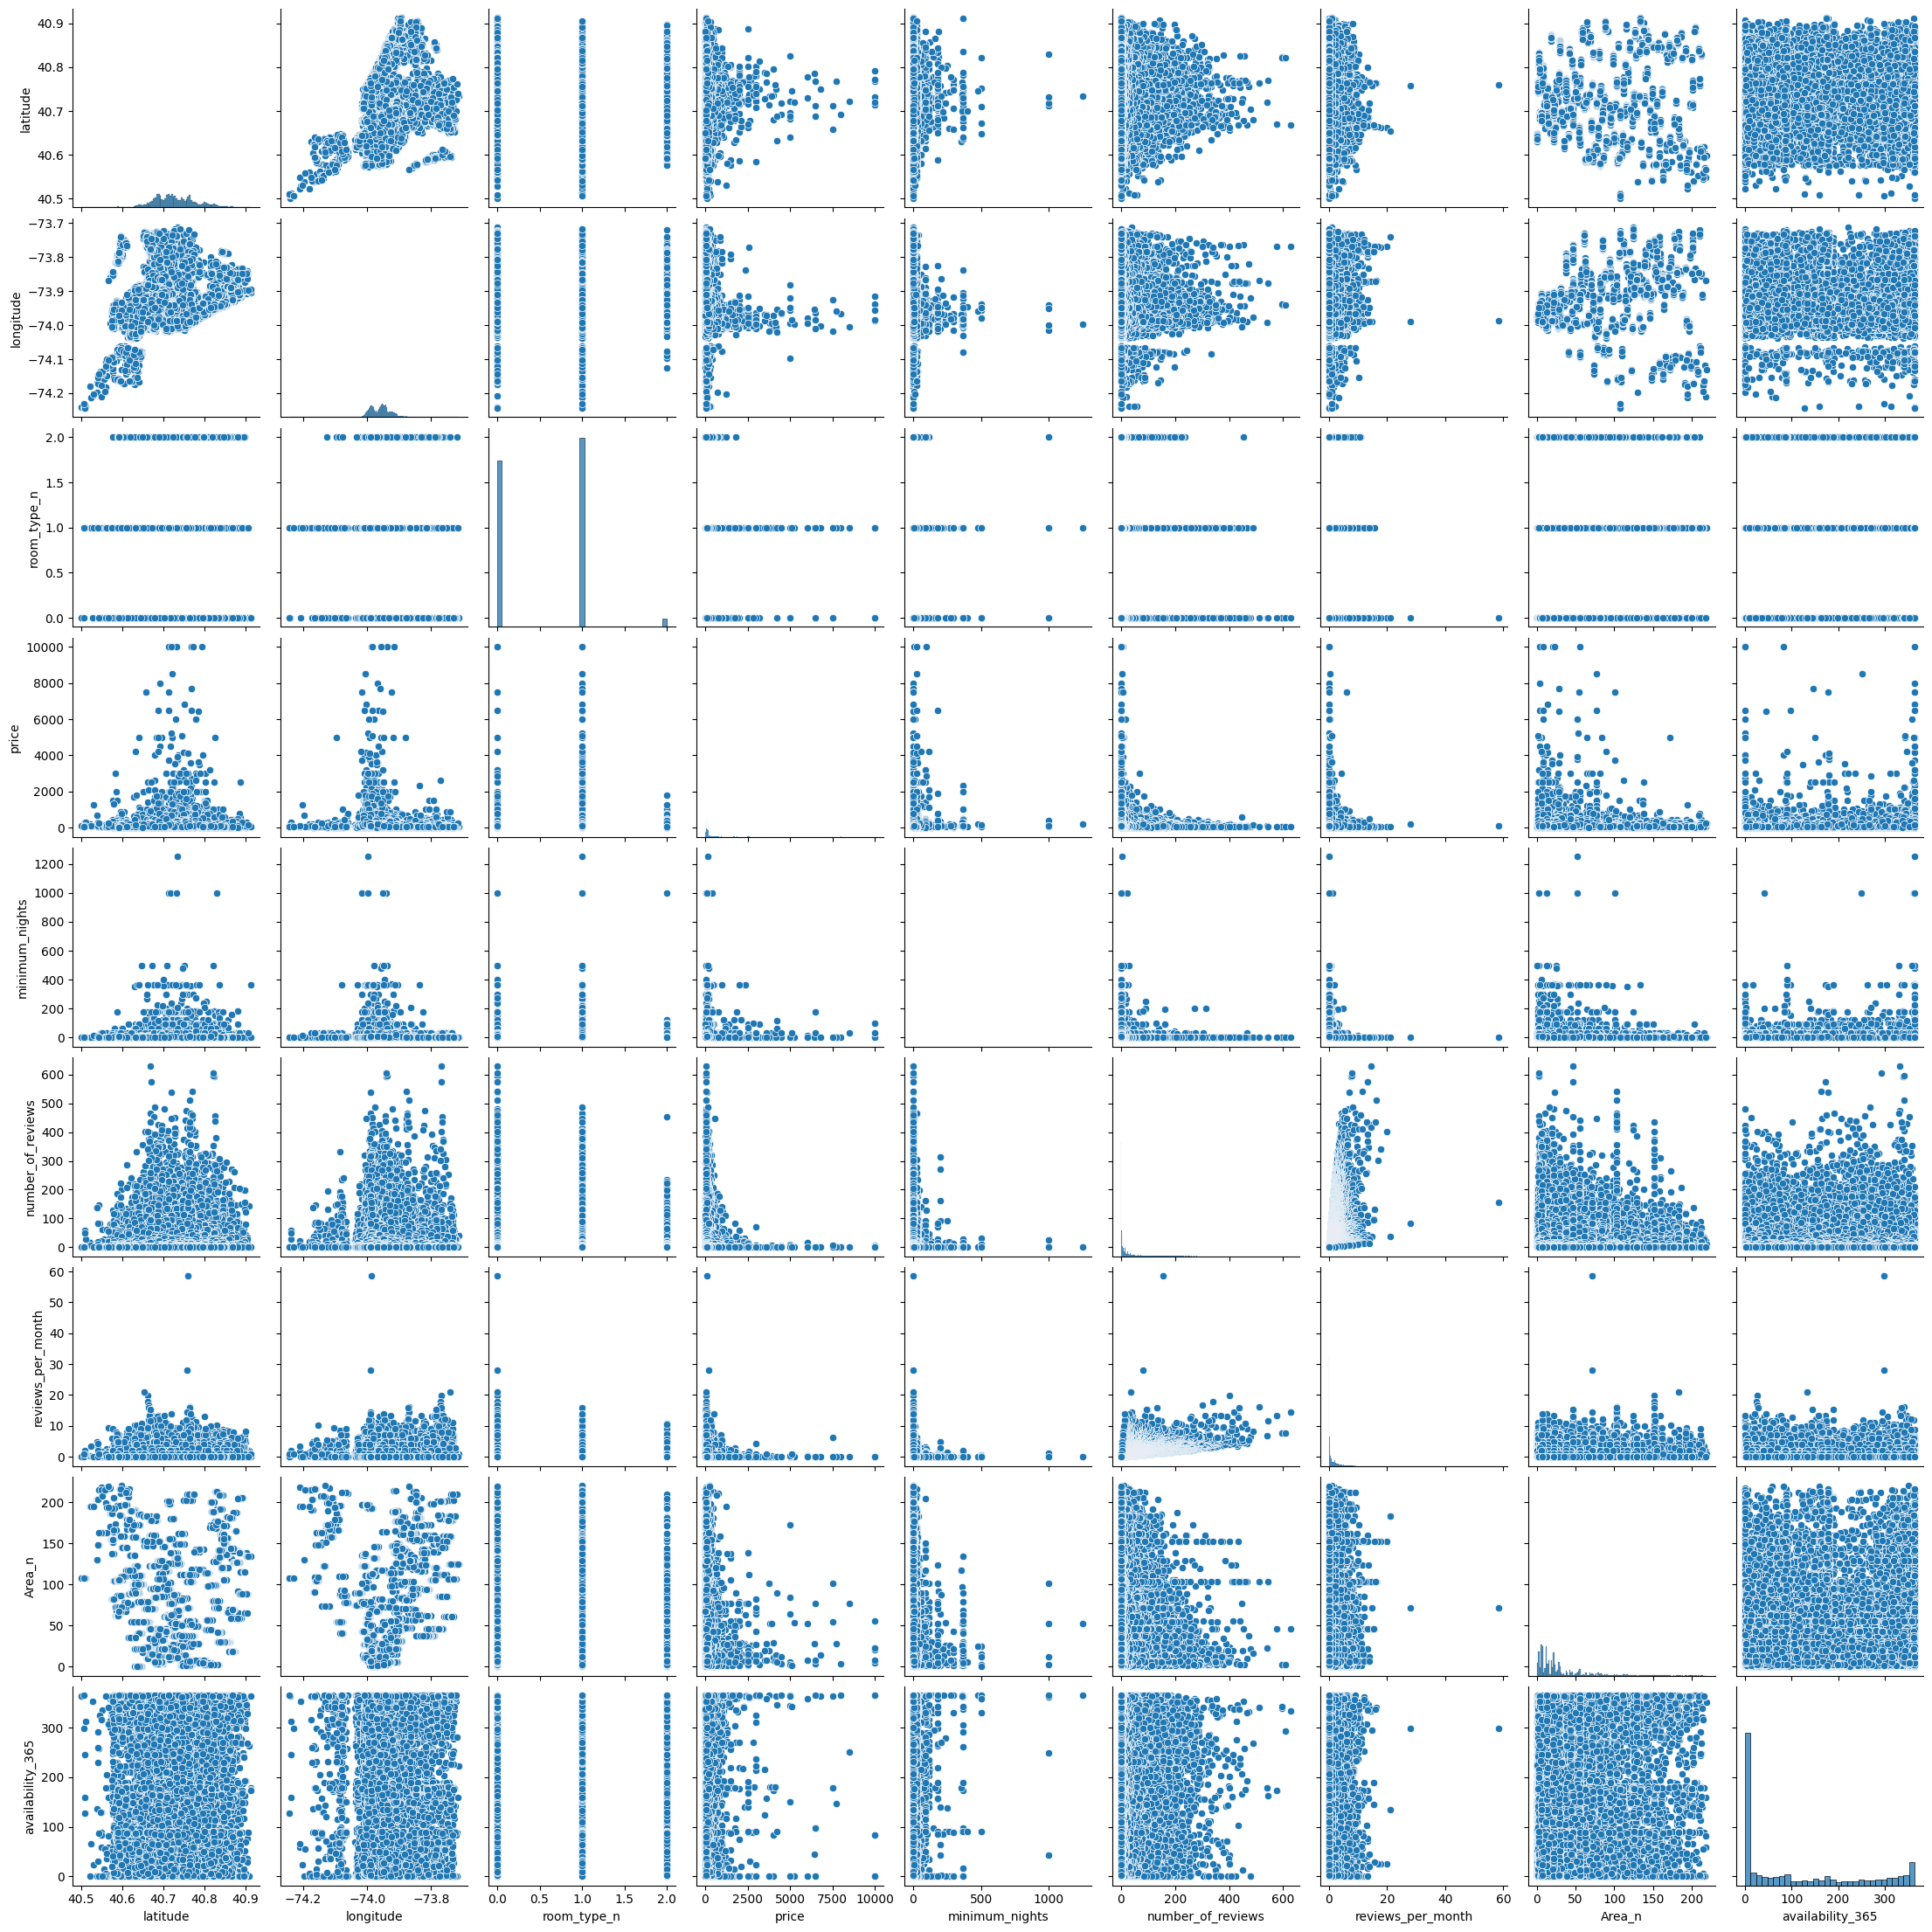

In [37]:
# STEP 8) First Multivariate Analysis

# 8.A) Scatterplot Correlations Overview

df_correlations = df[["latitude","longitude", "room_type_n", "price","minimum_nights","number_of_reviews", "reviews_per_month", "Area_n", "availability_365"]]
sns.pairplot(data = df_correlations)


In [38]:
# Correlations Data quality check:

df_correlations = df[["latitude","longitude", "room_type_n", "price","minimum_nights","number_of_reviews", "reviews_per_month", "Area_n", "availability_365"]]

df_correlations.isnull().sum()

latitude             0
longitude            0
room_type_n          0
price                0
minimum_nights       0
number_of_reviews    0
reviews_per_month    0
Area_n               0
availability_365     0
dtype: int64

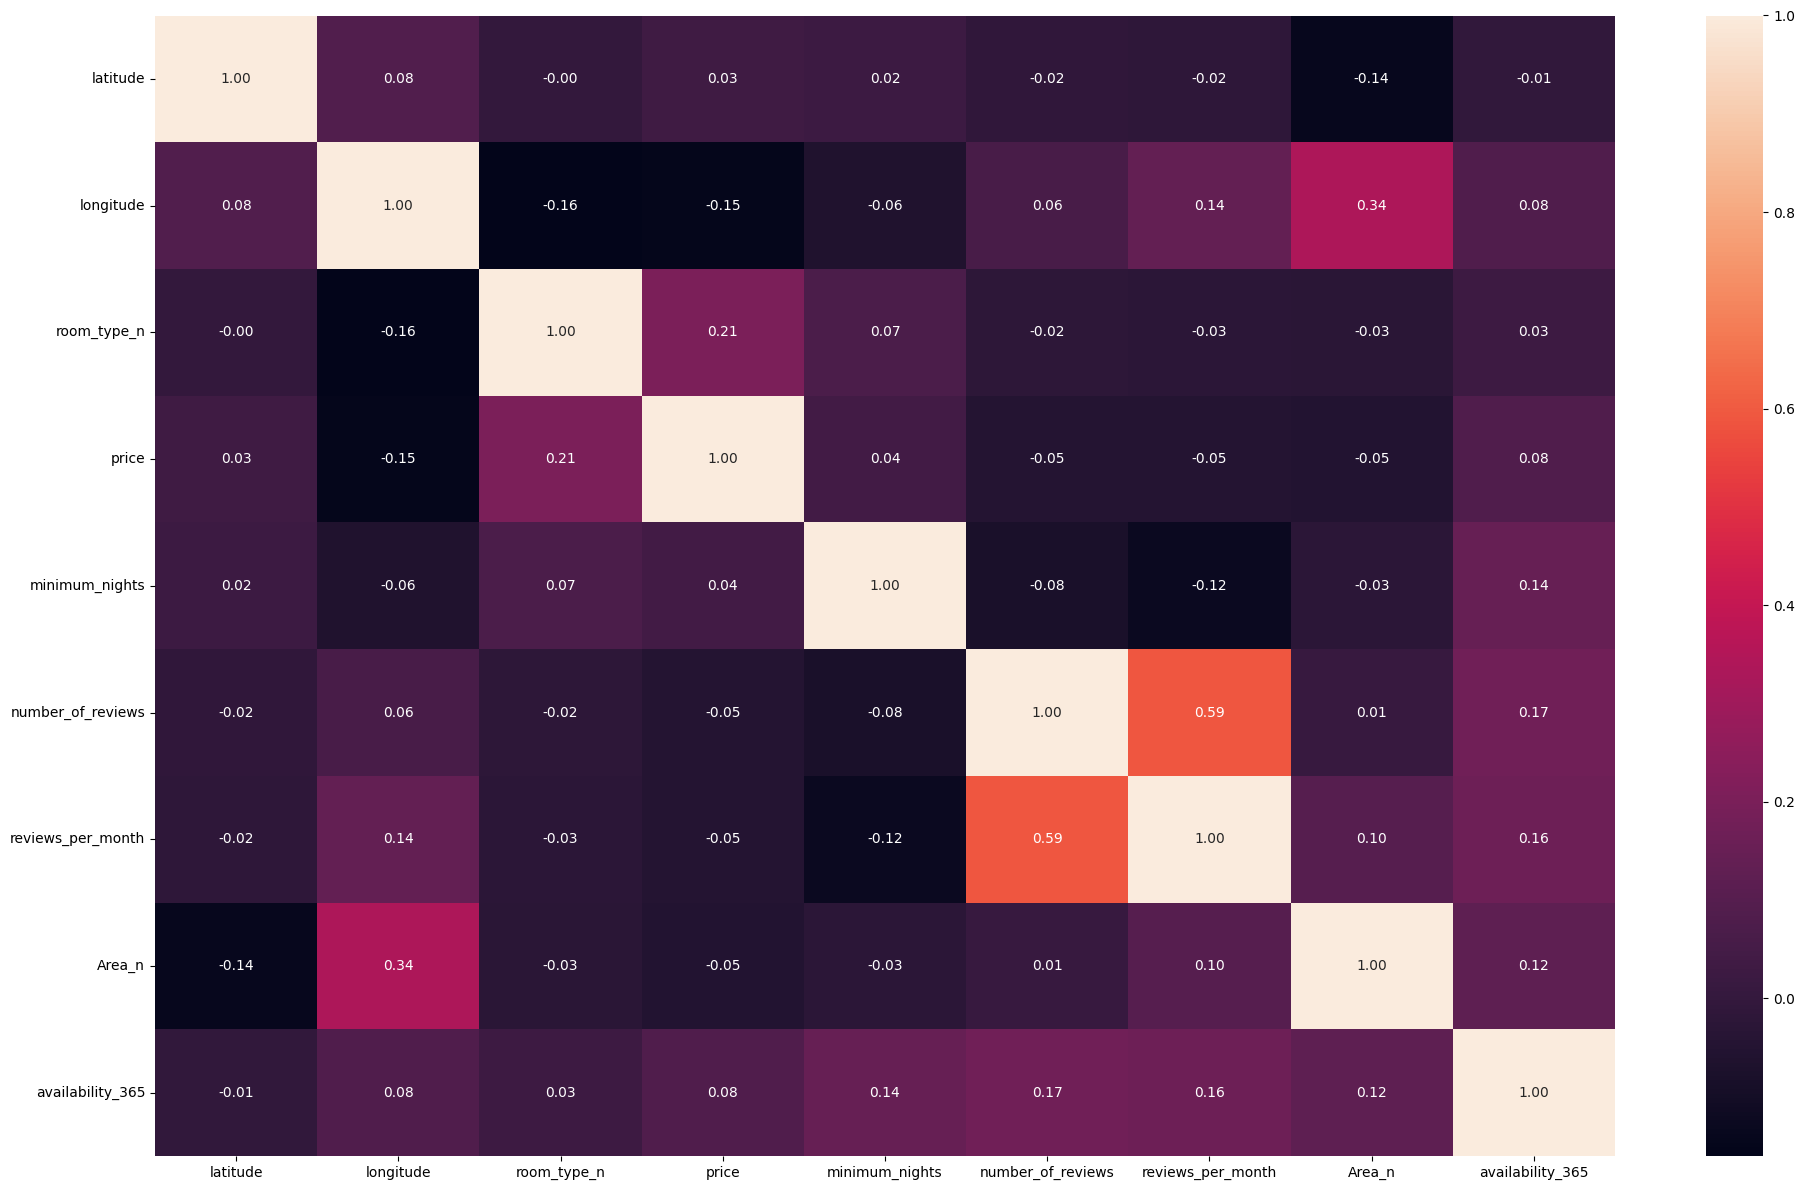

Out from the obvious ('Area' correlation to 'Longitude' and 'Latitutde', and with the review-related variables between themselves), in the heatmap we can observe slight correlations between 'price' and 'room_type' and 'price' and 'longitude' that will be further anaylsed below. There is also a slight correlation betweeen 'room_type' and 'longitude' that is out of the scope of the problem statement.


In [39]:
# STEP 8) First Multivariate Analysis: 

# 8.B) Heatmap Correlations Overview 

fig, axis = plt.subplots(figsize = (20, 12))

sns.heatmap(df[["latitude","longitude", "room_type_n", "price","minimum_nights","number_of_reviews", "reviews_per_month", "Area_n", "availability_365"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

print(f"Out from the obvious ('Area' correlation to 'Longitude' and 'Latitutde', and with the review-related variables between themselves), in the heatmap we can observe slight correlations between 'price' and 'room_type' and 'price' and 'longitude' that will be further anaylsed below. There is also a slight correlation betweeen 'room_type' and 'longitude' that is out of the scope of the problem statement.")

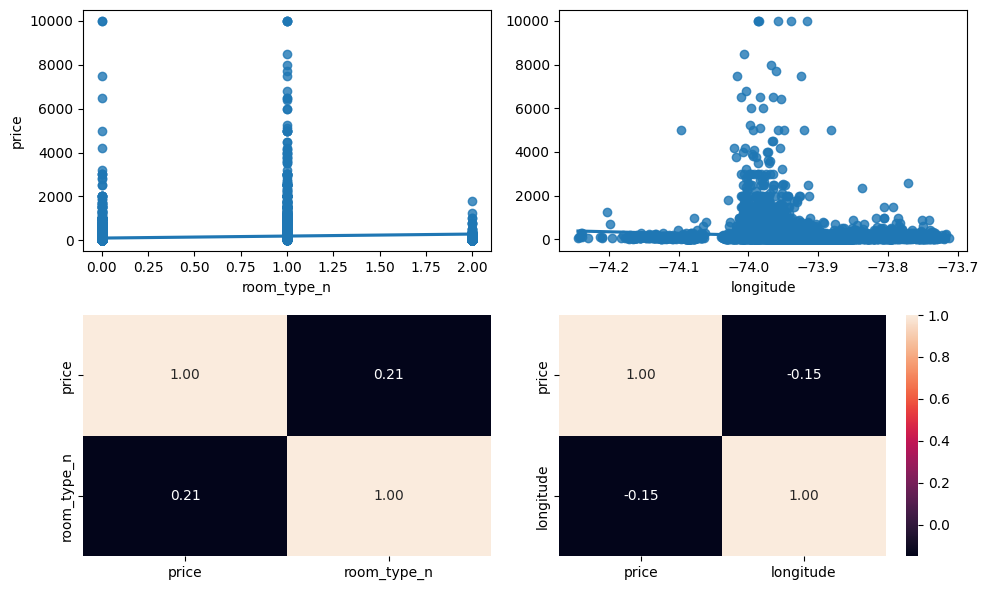

These plots reconfirm the slight correlations between price and room type and longitude respectively


In [ ]:
# STEP 8) Multivariate Analysis: 

# 8.F) Numerical-Numerical Variable Correlation: room_type and longitude to price

import matplotlib.pyplot as plt 
import seaborn as sns

fig, axis = plt.subplots(2, 2, figsize = (10, 6))

# Create a multiple scatter plot
sns.regplot(ax = axis[0, 0], data = df, x = "room_type_n", y = "price")
sns.heatmap(df[["price", "room_type_n"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)

sns.regplot(ax = axis[0, 1], data = df, x = "longitude", y = "price").set(ylabel=None)
sns.heatmap(df[["price", "longitude"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

print("These plots reconfirm the slight correlations between price and room type and longitude respectively")


In [ ]:
# STEP 8) Multivariate Analysis: 

# 8.C) Numerical-Numerical Variable Correlation: Further identifying correlations with "Price"

df_correlations = df[["latitude","longitude", "room_type_n", "price","minimum_nights","number_of_reviews", "reviews_per_month", "Area_n"]]


# Calculate correlations with 'price'
price_correlation = df_correlations.corr()['price'].drop('price')

# Filter for correlations above 0.7
price_high_correlation = price_correlation[abs(price_correlation) > 0.7]

# Filter the min correlation treshold
some_correlation = price_correlation[abs(price_correlation) >= 0.15]  # Use abs for both positive & negative

if not price_high_correlation.empty:
    print(f"There is a significant correlation (above 70%) between 'Price' and {price_high_correlation}")
elif not some_correlation.empty:
    print("There is no significant correlation (above 70%) between 'Price' and any other variable.")
    print("However, there are small correlations (above 20% or below -10%) with:")
    for variable, correlation in some_correlation.items():
        print(f"  - {variable}: {correlation:.2f}")  # Format correlation to 2 decimal places
else:
    print("There are is no correlation worth mentioning between 'Price' and any other variable")

There is no significant correlation (above 70%) between 'Price' and any other variable.
However, there are small correlations (above 20% or below -10%) with:
  - longitude: -0.15
  - room_type_n: 0.21


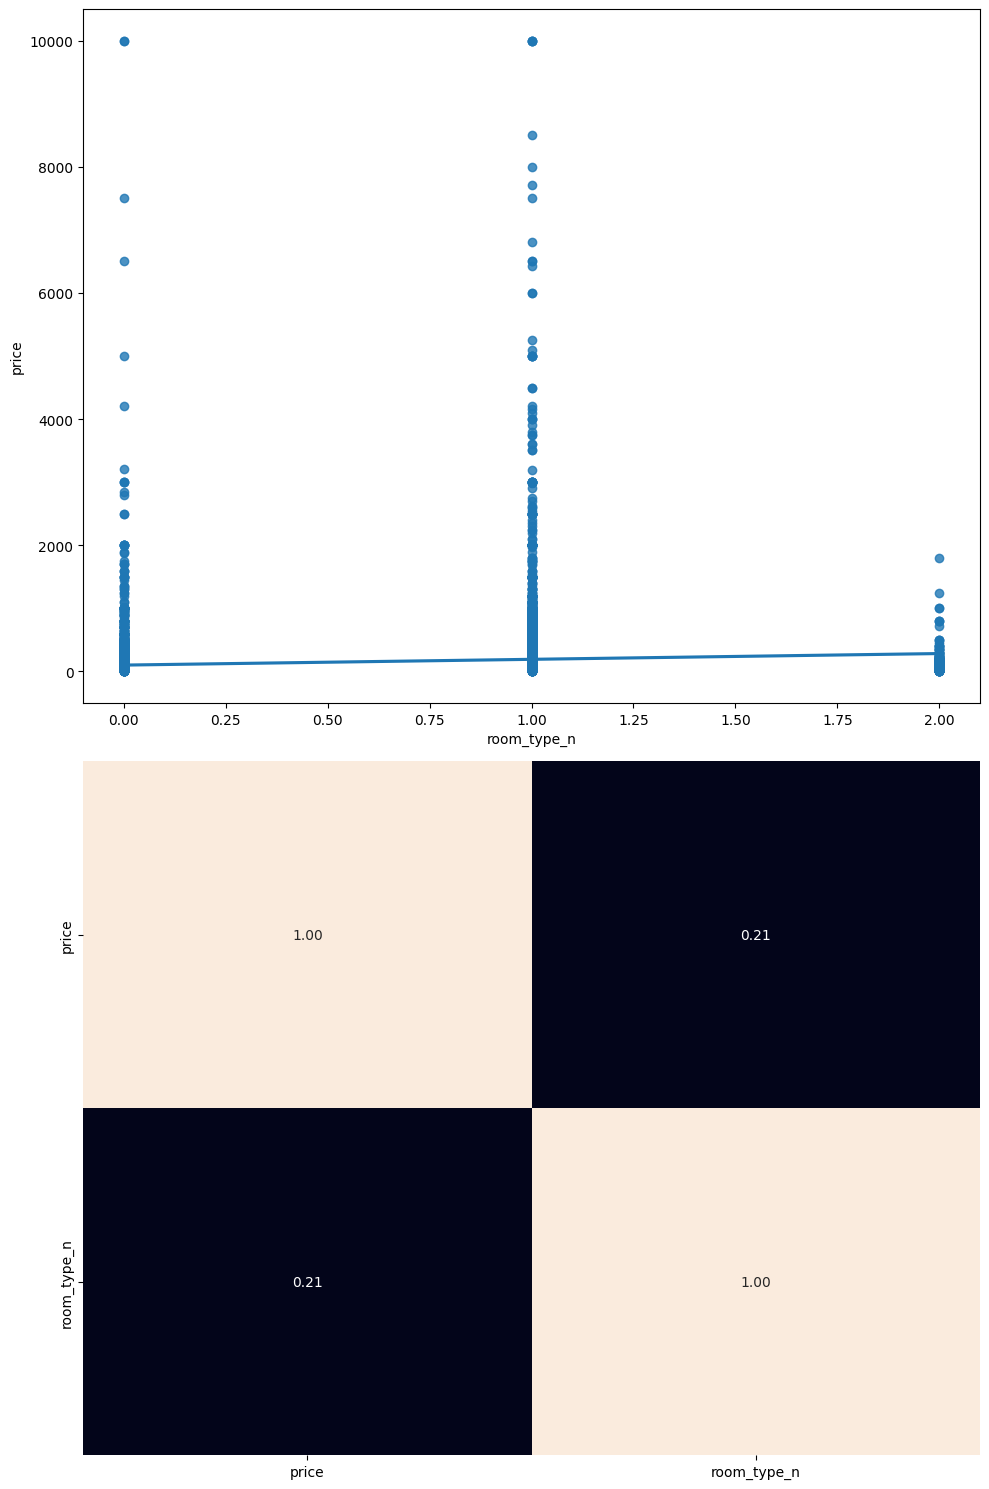

In [ ]:
# STEP 8) Multivariate Analysis: 

# 8.D) Numerical-Numerical Variable Correlation: Zooming in into the slight correlation between "Price" and room_type:

fig, axis = plt.subplots(2, 1, figsize=(10,15)) 

sns.regplot(data=df, x="room_type_n", y="price", ax=axis[0]) 
sns.heatmap(df[["price", "room_type_n"]].corr(), annot=True, fmt=".2f", ax=axis[1], cbar=False)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

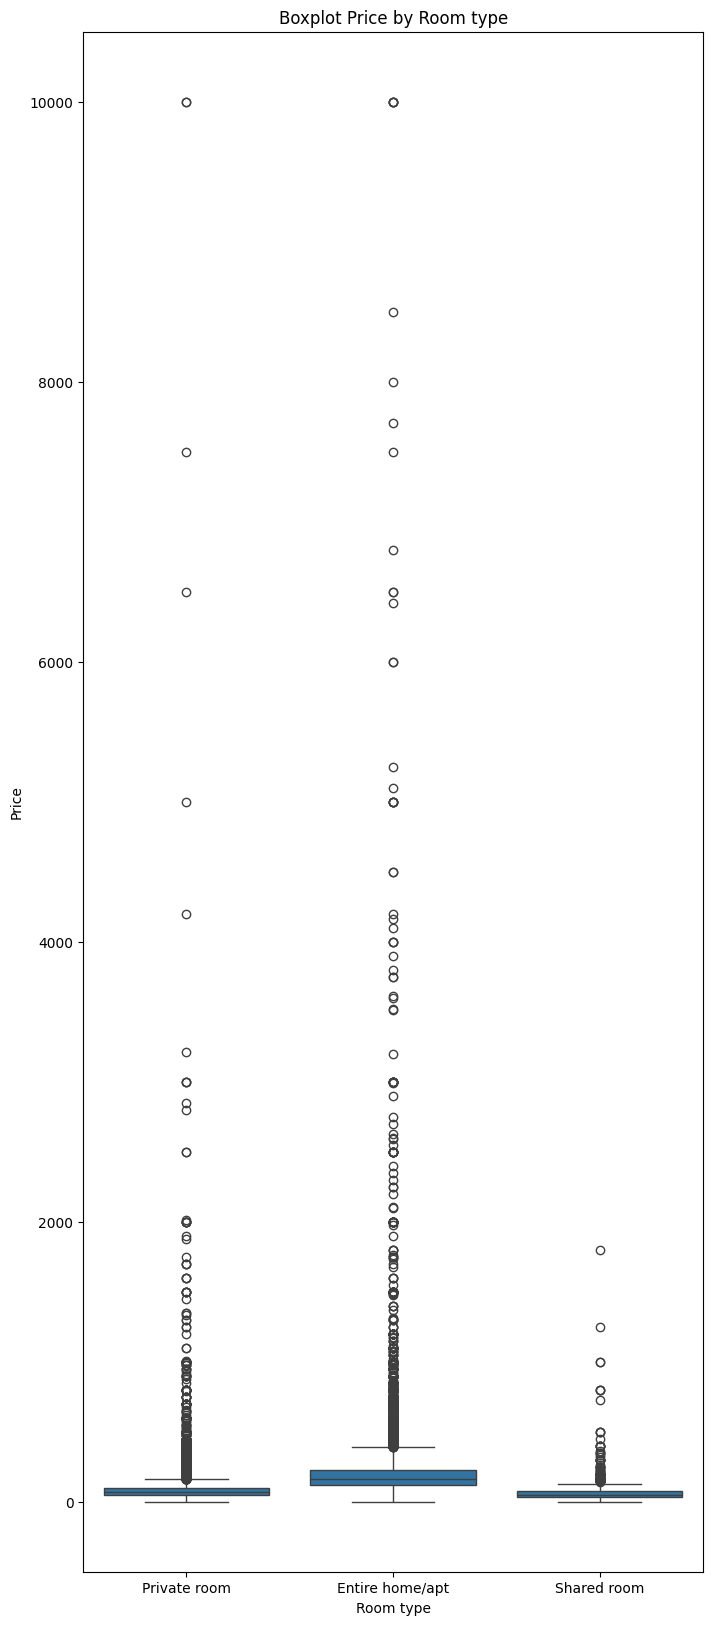

The boxplots show a clear trend of increasing price as you move from shared rooms to private rooms and then to entire homes/apartments. This suggests a moderate positive correlation (21%) between room type and price in the Airbnb dataset.
In a more in-depth conclussion, we see that the median Price for each room type (The horizontal line inside each box represents the median price), is higher and shows a potential correlation between room type and price than other types. In this case, 'Entire home/apt' has a noticeably higher median price than 'Private room' and 'Shared room.
Also and since the box itself represents the interquartile range (IQR), containing the middle (50%) of the data and the box height indicates the variability of prices within each room type, 'Entire home/apt' has a larger IQR thant the other types, suggesting more price variability for this room type.
Finally and based on the outliers, they are also more pronounced for 'Entire home/apt,' further supporting the pric

In [ ]:
# STEP 8) Multivariate Analysis: 

# 8.E) Numerical-Numerical Variable Correlation: Zooming in into the slight correlation between "Price" and "room_type":

plt.figure(figsize=(8, 20))

sns.boxplot(x="room_type", y="price", data=df)

plt.title('Boxplot Price by Room type')
plt.xlabel('Room type')
plt.ylabel('Price')
plt.show()

print("The boxplots show a clear trend of increasing price as you move from shared rooms to private rooms and then to entire homes/apartments. This suggests a moderate positive correlation (21%) between room type and price in the Airbnb dataset.")
print("In a more in-depth conclussion, we see that the median Price for each room type (The horizontal line inside each box represents the median price), is higher and shows a potential correlation between room type and price than other types. In this case, 'Entire home/apt' has a noticeably higher median price than 'Private room' and 'Shared room.")
print("Also and since the box itself represents the interquartile range (IQR), containing the middle (50%) of the data and the box height indicates the variability of prices within each room type, 'Entire home/apt' has a larger IQR thant the other types, suggesting more price variability for this room type.")
print("Finally and based on the outliers, they are also more pronounced for 'Entire home/apt,' further supporting the price difference.")

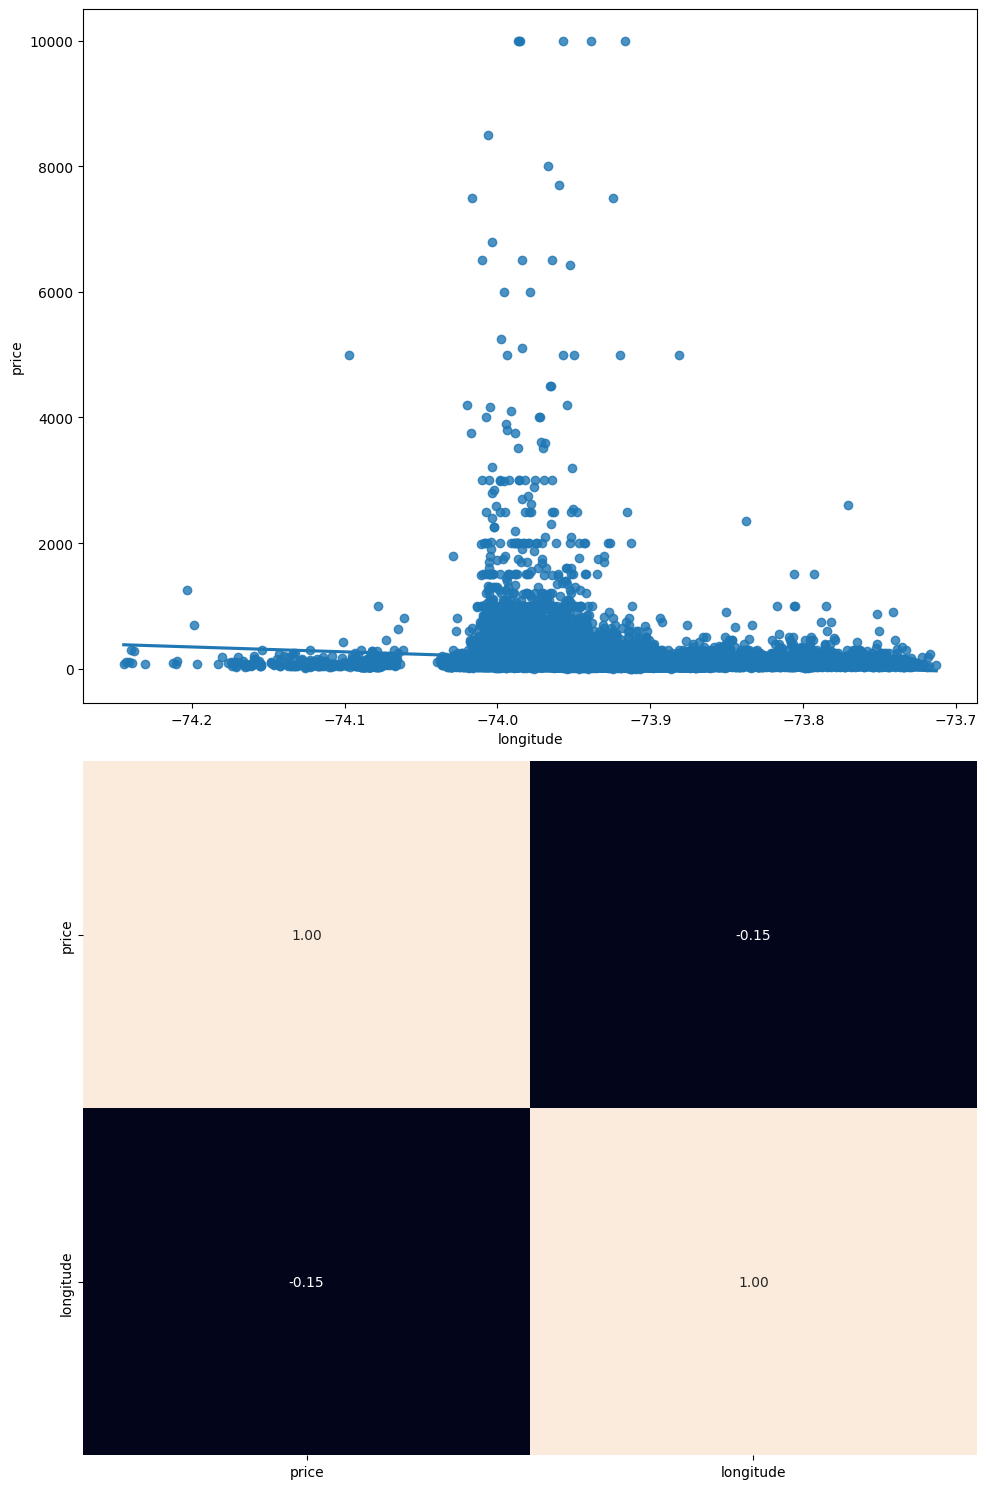

The boxplot shows a slight trend of decreasing price as you move to lower longitudes (to Western NY). This suggests a moderate negative correlation (-15%) between longitude and price in the Airbnb dataset, being slightly more expensive listing located in the East side of NY.


In [ ]:
# STEP 8) Multivariate Analysis: 

# 8.F) Numerical-Numerical Variable Correlation: Zooming in into the slight inverse correlation between "Price" and "longitud":

fig, axis = plt.subplots(2, 1, figsize=(10,15)) 

sns.regplot(data=df, x="longitude", y="price", ax=axis[0]) 
sns.heatmap(df[["price", "longitude"]].corr(), annot=True, fmt=".2f", ax=axis[1], cbar=False)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

print("The boxplot shows a slight trend of decreasing price as you move to lower longitudes (to Western NY). This suggests a moderate negative correlation (-15%) between longitude and price in the Airbnb dataset, being slightly more expensive listing located in the East side of NY.")


In [ ]:
df.columns

Index(['neighbourhood_group', 'neighbourhood', 'latitude', 'longitude',
       'room_type', 'price', 'minimum_nights', 'number_of_reviews',
       'last_review', 'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'Area', 'room_type_n', 'last_review_n', 'Area_n',
       'neighbourhood_group_n'],
      dtype='object')

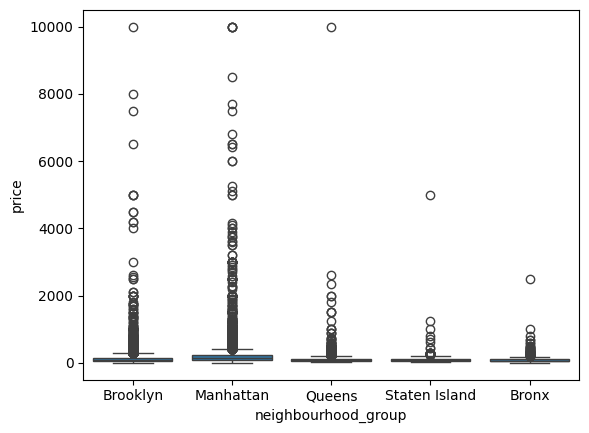

As we can observe in the boxplot, higher prices are cleary more common in Manhattan and Brooklyn, despite the outliers found in the rest of the areas.
This plot helps us understand why against all odds, neighbourhood_group (Factorize to 'Area_n') we have not find enough correlation between price and location in previous analysis, pushing for further correlation analysis in this sense after dealing with price outliers by area.


In [41]:
# STEP 8) Multivariate Analysis: 

# 8.F) Categorical-Categorical Analysis of "price" with other categorical variables: 'neighbourhood_group'

import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='neighbourhood_group', y='price', data=df)
plt.show()

print("As we can observe in the boxplot, higher prices are cleary more common in Manhattan and Brooklyn, despite the outliers found in the rest of the areas.")
print("This plot helps us understand why against all odds, neighbourhood_group (Factorize to 'Area_n') we have not find enough correlation between price and location in previous analysis, pushing for further correlation analysis in this sense after dealing with price outliers by area.")


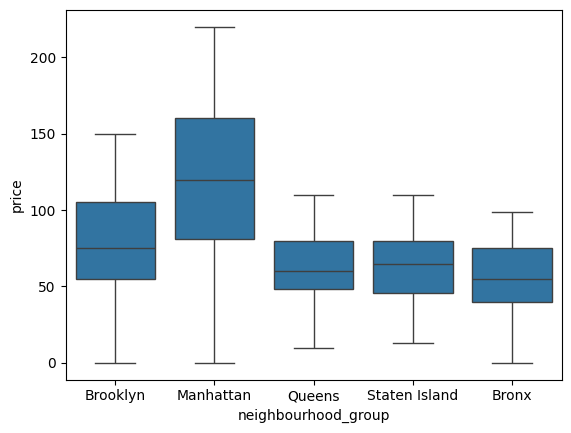

Even skipping the 75% upper outliers, the correlation between price and neighbourhood_group keeps being very slow: -0.0125
In summary, the box plot visually demonstrates a low correlation between price and neighborhood group because it shows substantial variability within each group, significant overlap between groups, and relatively small differences in median prices. This suggests that while there might be some influence of neighborhood group on price, other factors likely play a more significant role in determining the price of an Airbnb listing.
The large spread of data within each neighborhood group (as seen in the box and whisker lengths) indicates that price varies considerably even within the same location. This implies a weak relationship between of neighbourhood and price.
There is also a substantial overlap in price ranges across different neighborhood groups (where the boxes and whiskers overlap, suggests that knowing the neighborhood group alone doesn't provide a lot of in

In [ ]:
# STEP 8) Multivariate Analysis: 

# 8.E) Further Categorical-Categorical Analysis of "price" and 'neighbourhood_group' dropping upper 75% outliers:


import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming your DataFrame is named 'df' and has columns 'neighbourhood_group' and 'price'

# 1. Calculate the 75th percentile for each neighbourhood_group
percentile_75 = df.groupby('neighbourhood_group')['price'].quantile(0.75)

# 2. Filter out outliers above the 75th percentile for each group
filtered_df = df[df.apply(lambda row: row['price'] <= percentile_75[row['neighbourhood_group']], axis=1)]

# 3. Create the box plot without outliers
sns.boxplot(x='neighbourhood_group', y='price', data=filtered_df)
plt.show()

# 4. Calculate and print the correlation (using filtered data)
# Convert the numpy array to a Pandas Series with dtype="category":
neighbourhood_group_series = pd.Series(filtered_df['neighbourhood_group'], dtype="category")

# Factorize for correlation:
factorized_neighbourhood_group = pd.factorize(neighbourhood_group_series)[0]

# Convert factorized_neighbourhood_group to a Pandas Series:
factorized_neighbourhood_group_series = pd.Series(factorized_neighbourhood_group) 

# Now calculate the correlation:
correlation = filtered_df['price'].corr(factorized_neighbourhood_group_series)

print(f"Even skipping the 75% upper outliers, the correlation between price and neighbourhood_group keeps being very slow: {round(correlation, 4)}")
print("In summary, the box plot visually demonstrates a low correlation between price and neighborhood group because it shows substantial variability within each group, significant overlap between groups, and relatively small differences in median prices. This suggests that while there might be some influence of neighborhood group on price, other factors likely play a more significant role in determining the price of an Airbnb listing.")
print("The large spread of data within each neighborhood group (as seen in the box and whisker lengths) indicates that price varies considerably even within the same location. This implies a weak relationship between of neighbourhood and price.")
print("There is also a substantial overlap in price ranges across different neighborhood groups (where the boxes and whiskers overlap, suggests that knowing the neighborhood group alone doesn't provide a lot of information about the price of a listing.")
print("Although there might be some differences in median prices between groups (black line inside the blue boxes), they are not large or consistent enough to indicate a strong correlation.")